In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('mnist_train.csv')
data = file.copy()
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_file = pd.read_csv('mnist_test.csv')
test_data = test_file.copy()
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.iloc[:, 0].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [5]:
data[data['label'] == 0]

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
label_0 = data[data['label'] == 0]
cluster_0 = []
for i in range(1, 785):
    cluster_0.append(label_0.iloc[:, i].mean())

In [7]:
label_1 = data[data['label'] == 1]
cluster_1 = []
for i in range(1, 785):
    cluster_1.append(label_1.iloc[:, i].mean())

In [8]:
label_2 = data[data['label'] == 2]
cluster_2 = []
for i in range(1, 785):
    cluster_2.append(label_2.iloc[:, i].mean())

In [9]:
label_3 = data[data['label'] == 3]
cluster_3 = []
for i in range(1, 785):
    cluster_3.append(label_3.iloc[:, i].mean())

In [10]:
label_4 = data[data['label'] == 4]
cluster_4 = []
for i in range(1, 785):
    cluster_4.append(label_4.iloc[:, i].mean())

In [11]:
label_5 = data[data['label'] == 5]
cluster_5 = []
for i in range(1, 785):
    cluster_5.append(label_5.iloc[:, i].mean())

In [12]:
label_6 = data[data['label'] == 6]
cluster_6 = []
for i in range(1, 785):
    cluster_6.append(label_6.iloc[:, i].mean())

In [13]:
label_7 = data[data['label'] == 7]
cluster_7 = []
for i in range(1, 785):
    cluster_7.append(label_7.iloc[:, i].mean())

In [14]:
label_8 = data[data['label'] == 8]
cluster_8 = []
for i in range(1, 785):
    cluster_8.append(label_8.iloc[:, i].mean())

In [15]:
label_9 = data[data['label'] == 9]
cluster_9 = []
for i in range(1, 785):
    cluster_9.append(label_9.iloc[:, i].mean())

In [16]:
def distance(row, cluster):
    dist = 0
    for i in range(1, 784):
        dist += (row[i] - cluster[i-1])**2
    return math.sqrt(dist)

In [17]:
data.iloc[0][1]

0

In [18]:
distance(data.iloc[0], cluster_0)

2073.8304963947426

In [19]:
d = {'cluster_0': cluster_0,'cluster_1': cluster_1,'cluster_2': cluster_2,'cluster_3': cluster_3,'cluster_4': cluster_4,
  'cluster_5': cluster_5,
  'cluster_6': cluster_6,
  'cluster_7': cluster_7,
  'cluster_8': cluster_8,
  'cluster_9': cluster_9
}

In [20]:
def dist_point_name(row):
    dict_dist = {}
    for i in range(10):
        dict_dist[i] = distance(row, d['cluster_'+str(i)])
    return list(dict_dist.keys())[list(dict_dist.values()).index(min(dict_dist.values()))]

In [21]:
dist_point_name(test_data.iloc[0])

7

In [22]:
actual_values = []
predicted_values = []
for i in range(len(test_data)):
    predicted_values.append(dist_point_name(test_data.iloc[i]))
    actual_values.append(list(test_data.iloc[i])[0])

In [23]:
actual_values

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [24]:
predicted_values

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 2,
 9,
 0,
 2,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 7,
 6,
 4,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 1,
 3,
 5,
 5,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 2,
 5,
 4,
 1,
 9,
 1,
 7,
 8,
 9,
 2,
 7,
 9,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 8,
 1,
 7,
 3,
 7,
 1,
 7,
 9,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 1,
 6,
 9,
 6,
 0,
 5,
 4,
 4,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 3,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 1,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 3,
 4,
 4,
 1,
 9,
 4,
 7,
 3,
 3,
 2,
 1,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 3,
 9,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 1,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 1,
 9,
 0,
 3,
 5,
 7,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 3,
 3,
 8,
 4,
 1,
 6,
 0,
 2,
 4,
 1,


In [25]:
count = 0
for i in range(len(actual_values)):
    if actual_values[i] == predicted_values[i]:
        count += 1
count/len(actual_values)*100

82.03

In [26]:
len(actual_values)

10000

In [27]:
len(predicted_values)

10000

In [28]:
count

8203

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

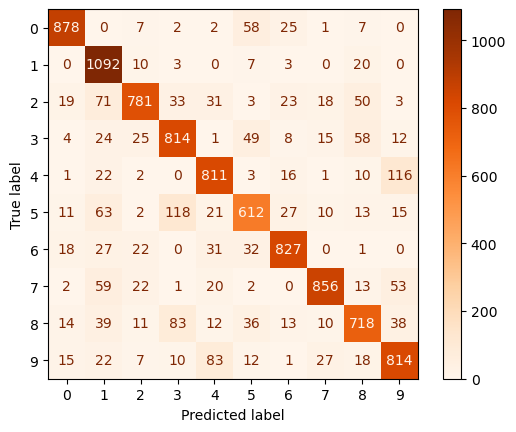

In [38]:
ConfusionMatrixDisplay.from_predictions(actual_values,predicted_values,cmap="Oranges")

In [40]:
print(classification_report(actual_values,predicted_values))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       980
           1       0.77      0.96      0.86      1135
           2       0.88      0.76      0.81      1032
           3       0.77      0.81      0.78      1010
           4       0.80      0.83      0.81       982
           5       0.75      0.69      0.72       892
           6       0.88      0.86      0.87       958
           7       0.91      0.83      0.87      1028
           8       0.79      0.74      0.76       974
           9       0.77      0.81      0.79      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

